# ARIMA Model:
The ARIMA model is a popular choice for time series forecasting. It is a combination of three
- ARIMA(p, d, q) - p: number of autoregressive terms, d : number of differences, q: number of moving average terms
### Statistical Modeling behind the ARIMA:
ARIMA model is based on the following statistical concepts:
- Autoregression: The ARIMA model uses past values of the time series to forecast future values
- Moving Average: The ARIMA model uses the errors from past predictions to improve future predictions
- Differencing: The ARIMA model uses differencing to remove non-stationarity from the
time series data
### ARIMA Model Components:
- AR (p) - Autoregressive component: This component uses past values of the time series
to forecast future values
- I (d) - Integrated component: This component uses differencing to remove non-stationarity
from the time series data
- MA (q) - Moving Average component: This component uses the errors from past predictions
to improve future predictions
### ARIMA Model Parameters:
       p: number of autoregressive terms
       d: number of differences
       q: number of moving average terms


# SARIMA Model:

- The SARIMA model is a type of time series forecasting model that combines the strengths of ARIMA
(AutoRegressive Integrated Moving Average) and SAR (Seasonal AR) models.
- It is used to forecast time series data that exhibits seasonality and non-seasonal patterns.
### The SARIMA model is defined by the following parameters:
- `p`: The number of autoregressive terms.
- `d`: The degree of differencing (i.e., the number of times the data is differ
enced to make it stationary).
- `q`: The number of moving average terms.
- `P`: The number of seasonal autoregressive terms.
- `D`: The degree of seasonal differencing.
- `Q`: The number of seasonal moving average terms.
- The SARIMA model can be used to forecast time series data with multiple seasonalities.


In [1]:
#Import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#import the dataset:
df = pd.read_csv('airline-passengers.csv')
 # print the first 5 rows of the dataset
df.head() 


,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


144    439.855201
145    465.297089
146    500.666558
147    535.971605
148    561.688814
149    571.311883
150    562.970980
151    539.727906
152    508.527243
153    478.147169
Name: predicted_mean, dtype: float64


c:\Users\Al Hafiz Enterprises\miniconda3\envs\tf_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


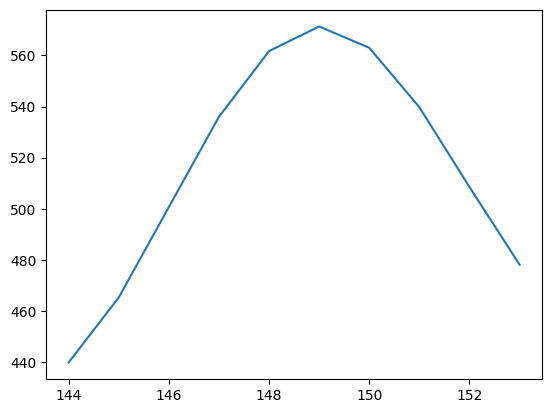

In [5]:
#Import the model ARIMA Model:
model = ARIMA(df['total_passengers'], order=(2, 1, 2))
#Fit the model
model_fit = model.fit()
#Predict the forecast:
prediction= model_fit.forecast(steps=10)
print(prediction)
#Plot the prediction:
plt.plot(prediction)

In [6]:
#Summary of model:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       total_passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Mon, 19 Aug 2024   AIC                           1353.347
Time:                        04:23:27   BIC                           1368.161
Sample:                             0   HQIC                          1359.366
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.802      0.0

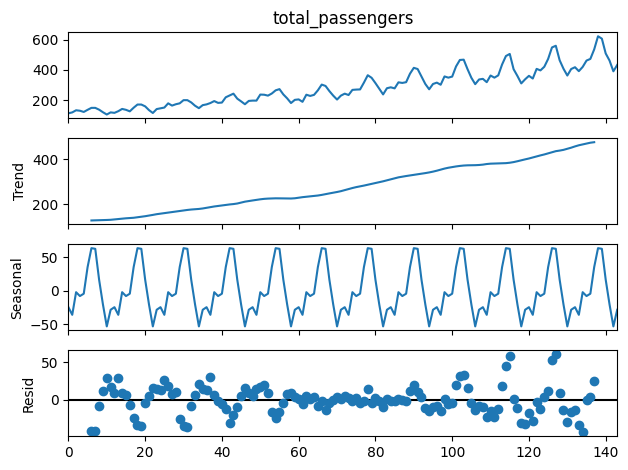

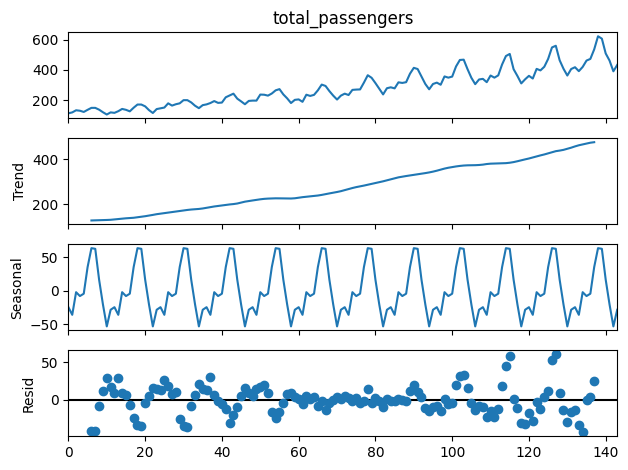

In [10]:
#Decomposition of dataset with total_passengers:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['total_passengers'], model="additive", period=12)
# plot the decompose:
decomposition.plot()

In [12]:
#Check the stationarity of dataset:
from statsmodels.tsa.stattools import adfuller
results = adfuller(df["total_passengers"].dropna())
print("ADF Statistics: %f" % results[0])
print("p-value: %f" % results[1])
#Check the data either stationary or not?
print("Is result is stationary?", results[1] <= 0.05)


ADF Statistics: 0.815369
p-value: 0.991880
Is result is stationary? False


In [15]:
#Import the statsmodels auto corrlation and partial correlation libraries:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9, 7), 'figure.dpi':120})
#Import the random data of wwwusage.csv from githib:
import pandas as pd
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

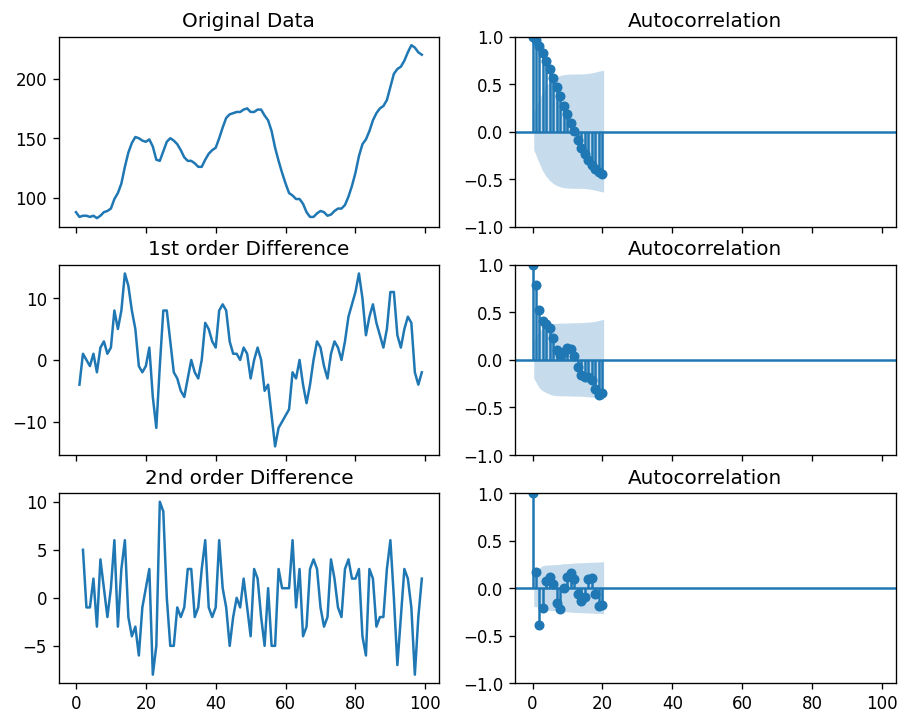

In [17]:
#Now plot the acf with original dataset:
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0,0].plot(df.value); axes[0, 0].set_title('Original Data')
plot_acf(df.value, ax=axes[0, 1])
#Plot the 1difference:
axes[1,0].plot(df.value.diff()); axes[1, 0].set_title("1st order Difference")
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])
#2nd Difference:
axes[2,0].plot(df.value.diff().diff()); axes[2, 0].set_title("2nd order Difference")
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


In [22]:
#Apply the pmdarima difference test:
from pmdarima.arima.utils import ndiffs
y = df.value
ndiffs(y, test='adf')
ndiffs(y, test='kpss')
ndiffs(y, test='pp')
# To define the number of differnce b/w values:


2